# Week 5 & 6 Exercises  

***Karlie Schwartzwald  
DSC 540 Fall 2022  
Bellevue University***

Change#: 1  
Change(s) Made:  Activity 7  
Date of Change:  10/5/2022  
Author: Karlie Schwartzwald  
Change Approved by: Karlie Schwartzwald  
Date Moved to Production: 10/9/2022  

Change#: 2  
Change(s) Made:  Activity 8  
Date of Change:  10/7/2022  
Author: Karlie Schwartzwald  
Change Approved by: Karlie Schwartzwald  
Date Moved to Production: 10/9/2022 

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling with Python: Activity 7, page 207

In [2]:
!pip install tabula-py xlrd lxml

1. Open the page in a separate Chrome/Firefox tab and use something like an **Inspect Element** tool to view the source HTML and understand its structure.

In [3]:
from bs4 import BeautifulSoup

2. Read the page using bs4.

In [4]:
with open("Data-Wrangling-with-Python-master/Lesson05/Activity07/List of countries by GDP (nominal) - Wikipedia.htm", 'rb') as html:
    soup = BeautifulSoup(html)

In [5]:
all_tables = soup.find_all("table")

3. Find the table structure you will need to deal with. (how many tables are there?)

In [6]:
print(f'There are {len(all_tables)} tables in total.')

There are 9 tables in total.


4. find the right table using bs4.

In [7]:
data_table = soup.find("table", {"class": '"wikitable"|}'})
print(type(data_table))

<class 'bs4.element.Tag'>


5. Separate the source names and their corresponding data.

In [8]:
sources = data_table.tbody.findAll('tr',recursive=False)[0]
sources_list = [td for td in sources.findAll('td')]

In [9]:
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

In [10]:
data_tables = []
for td in data:
    data_tables.append(td.findAll('table'))

6. Get the source names from the list of sources you have created.

In [11]:
source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


7. Separate the header and data from the data that you separated before for the first source only, and then create a DataFrame using that.

In [12]:
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]
df1 = pd.DataFrame(data_rows1, columns=header1)
df1.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


8. Repeat the last task for the other two data sources.

In [13]:
# 2nd Data Source
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]

In [14]:
def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()

In [15]:
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]
df2 = pd.DataFrame(data_rows2, columns=header2)

In [16]:
df2.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


In [17]:
# 3rd Data Source
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]
df3 = pd.DataFrame(data_rows3, columns=header3)

In [18]:
df3.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


## Data Wrangling with Python: Activity 8, page 233

1. Read the **visit_data.csv** file.

In [19]:
visit_df = pd.read_csv('visit_data.csv')
visit_df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


2. Check for duplicates.

In [20]:
visit_df.duplicated().sum()

0

In [21]:
print(f"The number of first name duplicates is {sum(visit_df['first_name'].duplicated())}.")
print(f"The number of last name duplicates is {sum(visit_df['last_name'].duplicated())}.")
print(f"The number of email duplicates is {sum(visit_df['email'].duplicated())}.")

The number of first name duplicates is 320.
The number of last name duplicates is 299.
The number of email duplicates is 0.


3. Check if any essential column contains NaN.

In [22]:
visit_df.isnull().sum()

id              0
first_name    296
last_name     296
email           0
gender        505
ip_address      0
visit          26
dtype: int64

In [23]:
visit_df.dropna(subset=['visit'], inplace=True)

4. Get rid of the outliers.

In [24]:
size_before = visit_df.shape
print(size_before)

(974, 7)


In [25]:
first_quarter = np.percentile(visit_df['visit'], 25, interpolation = 'midpoint')
print(first_quarter)

795.0


In [26]:
# IQR
first_quarter = np.percentile(visit_df['visit'], 25, interpolation = 'midpoint')
third_quarter = np.percentile(visit_df['visit'], 75, interpolation = 'midpoint')
inter_quartile = third_quarter - first_quarter
upper_bound = third_quarter+1.5*inter_quartile
lower_bound = first_quarter-1.5*inter_quartile

In [27]:
no_outliers_df = visit_df.loc[(visit_df['visit'] <= upper_bound) & (visit_df['visit'] >= lower_bound)]

In [28]:
no_outliers_df.shape

(974, 7)

5. Report the size difference.

In [29]:
print(f"The original dataframe was 1000 rows. After removing NaN values in the 'visits' column, there were 974 rows. Then I applied the interquartile range method of finding outliers, and I found none. So the dataframe remains at 974 rows.")

The original dataframe was 1000 rows. After removing NaN values in the 'visits' column, there were 974 rows. Then I applied the interquartile range method of finding outliers, and I found none. So the dataframe remains at 974 rows.


6. Create a box plot to check for outliers.

<AxesSubplot:>

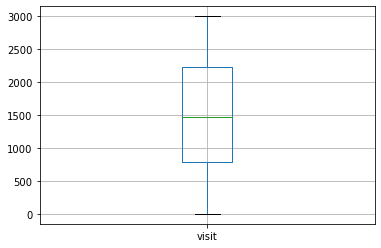

In [30]:
visit_df.boxplot(column = 'visit')

## Insert data into a SQL Lite database – create a table with the following data:  
(Hint: Python for Data Analysis page 191)  

a. Name, Address, City, State, Zip, Phone Number  

b. Add at least 10 rows of data and submit your code with a query generating your results.  

In [31]:
import sqlite3

In [32]:
query = """
.....: CREATE TABLE contact_infos
.....: (a VARCHAR(20), b VARCHAR(20),
.....: c VARCHAR(20), d VARCHAR(20), 
.....: e VARCHAR(20), VARCHAR(20)
.....: );"""

In [33]:
con = sqlite3.connect('mydata.sqlite')

In [34]:
con.execute(query)

OperationalError: near "(": syntax error

In [ ]:
con.commit()

In [ ]:
data = [("Joan Villarreal","Ap #977-3836 Augue. Av.","Oaxaca","South Jeolla","15277","1-434-587-8936"),
  ("Avye Blackburn","892-3722 Dictum Avenue","Ligao","Maluku","68632","1-462-594-8079"),
  ("Claudia Rodriquez","473 Ut St.","Alphen aan den Rijn","Aisén","879614","(698) 289-3221"),
  ("Salvador Riley","1080 Ridiculus St.","Martelange","Canarias","373383","1-593-881-4846"),
  ("Thor Riley","Ap #779-751 Nunc Street","Hạ Long","Nordrhein-Westphalen","3883","(571) 831-7147"),
  ("Ezekiel Simon","Ap #676-4504 Cum Rd.","Kostroma","Maluku","1744","(316) 284-8751"),
  ("Hakeem Weber","690-9738 Pede, Avenue","Montoggio","Tripura","422837","(277) 827-2074"),
  ("Ralph Oneil","142-8594 Mi Avenue","Bloomington","South Chungcheong","36722","1-435-134-4702"),
  ("Barbara Heath","506-1780 Nunc. Rd.","Chancay","Warwickshire","2268","(748) 342-8836"),
  ("Dacey Hurley","618 Consequat Ave","Gouda","Piemonte","7583-9548","1-494-334-2117")]



In [ ]:
 stmt = "INSERT INTO contact_info VALUES(?, ?, ?, ?, ?, ?)"

In [ ]:
con.executemany(stmt, data)

In [ ]:
con.commit()

In [ ]:
cur